## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata
study_results

mouse_metadata["Mouse ID"].count()

mouse_combined_df = pd.merge(mouse_metadata, study_results, how="outer", on = "Mouse ID")
mouse_combined_df

# # Clean out duplicate Mouse ID from mouse_metadata
# mouse_metadata_clean = mouse_metadata.drop_duplicates(subset=['Mouse ID'])
# mouse_metadata_clean
# mouse_metadata_clean["Mouse ID"].nunique()

# # Combine the data into a single dataset
# mouse_df = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")
# mouse_df = mouse_metadata.merge(study_results, on="Mouse ID")



# # Display the data table for preview
# mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice in the clean DataFrame.
mouse_df["Mouse ID"].nunique()

249

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_combined_df['Drug Regimen'].unique()
# array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
#        'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
#       dtype=object)

#group by drug regimen
mouse_drug_group_df = pd.DataFrame(mouse_combined_df.groupby("Drug Regimen").count())
mouse_drug_group_df

#Generate summary statistics in a new column
mouse_drug_group_df["Mean"] = pd.DataFrame(mouse_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
mouse_drug_group_df["Median"] = pd.DataFrame(mouse_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
mouse_drug_group_df["Standard Deviation"] = pd.DataFrame(mouse_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
mouse_drug_group_df["Variance"] = pd.DataFrame(mouse_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
mouse_drug_group_df["SEM"] = pd.DataFrame(mouse_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Recreate the grouped dataset with the summary statistics
mouse_drug_group_df = mouse_drug_group_df[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename Mouse ID column to Trials
mouse_drug_group_df = mouse_drug_group_df.rename(columns = {"Mouse ID" : "Trials"})
mouse_drug_group_df

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Trials')

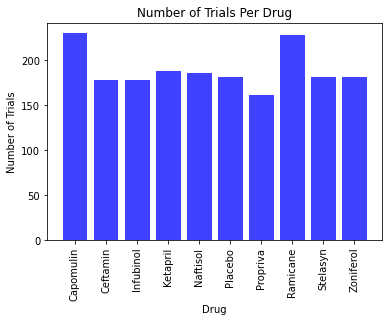

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
x_axis = np.arange(len(mouse_drug_group_df))
y_axis = mouse_drug_group_df["Trials"]

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_drug_group_df.index.values, rotation="vertical")
plt.bar(x_axis, y_axis, color='b', alpha=.75, align = 'center')
plt.title("Number of Trials Per Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Trials")


In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
